In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:

from google.colab import files 
  
  
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:

import pandas as pd 
import io 
advert = pd.read_csv(io.BytesIO(uploaded['Advertising.csv'])) 
print(advert)

        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [ ]:
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


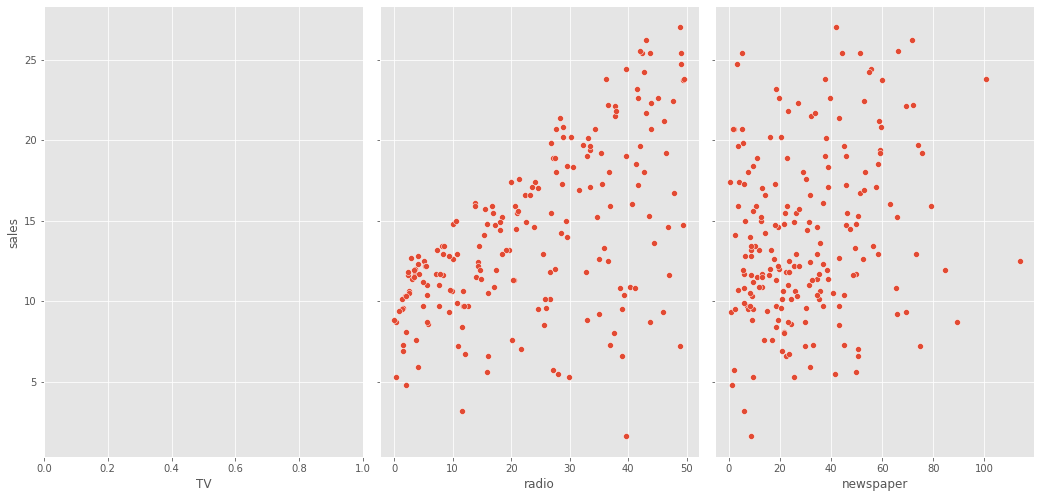

In [ ]:
sns.pairplot(advert,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7);

In [ ]:
from sklearn.linear_model import LinearRegression

x=advert[['TV','radio','newspaper']]
y=advert.sales

lm1=LinearRegression()
lm1.fit(x,y)

print(lm1.intercept_)
print(lm1.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [ ]:
list(zip(['Tv','radio','newspaper'],lm1.coef_))

[('Tv', 0.0457646454553976),
 ('radio', 0.18853001691820448),
 ('newspaper', -0.0010374930424763285)]

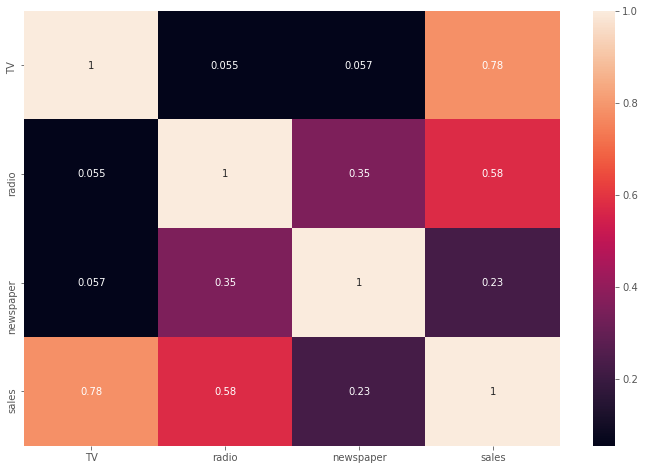

In [ ]:
sns.heatmap(advert.corr(),annot=True);

In [ ]:
from sklearn.metrics import r2_score

lm2=LinearRegression().fit(x[['TV','radio']],y)

lm2_pred = lm2.predict(x[['TV','radio']])

print("R2:", r2_score(y,lm2_pred))

R2: 0.8971942610828957


In [ ]:
lm3=LinearRegression().fit(x[['TV','radio','newspaper']],y)

lm3_pred = lm3.predict(x[['TV','radio','newspaper']])

print("R2:", r2_score(y,lm3_pred))




R2: 0.8972106381789522


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X=advert[['TV','radio','newspaper']]
y=advert.sales


X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

lm4 = LinearRegression().fit(X_train,y_train)

lm4_pred=lm4.predict(X_test)

print("RMSE:",np.sqrt(mean_squared_error(y_test,lm4_pred)))
print("R2:",r2_score(y_test,lm4_pred))

RMSE: 1.404651423032895
R2: 0.9156213613792232


In [ ]:
X=advert[['TV','radio']]
y=advert.sales


X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

lm5 = LinearRegression().fit(X_train,y_train)

lm5_pred=lm5.predict(X_test)

print("RMSE:",np.sqrt(mean_squared_error(y_test,lm5_pred)))
print("R2:",r2_score(y_test,lm5_pred))

RMSE: 1.3879034699382888
R2: 0.9176214942248907


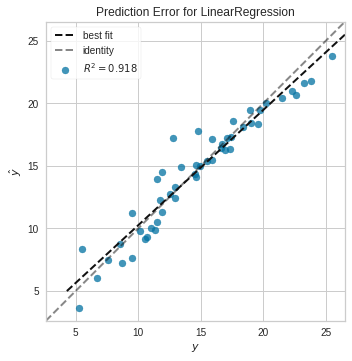

In [ ]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

visualizer = PredictionError(lm5).fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof();

In [ ]:
advert['interaction']=advert['TV']*advert['radio']

X=advert[['TV','radio','interaction']]

y=advert.sales

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

lm6 = LinearRegression().fit(X_train,y_train)

lm6_pred=lm6.predict(X_test)

print("RMSE:",np.sqrt(mean_squared_error(y_test,lm6_pred)))
print("R2:",r2_score(y_test,lm6_pred))


RMSE: 0.7011871137164328
R2: 0.978973681468126
